# MBEN & Decoupler
Decoupler is an ensemble of methods to infer biological activity. 

Used prior knowledge: 
- Dorothea for transcription factor analysis
- Progeny for pathway analysis



  


## Init Script

In [1]:
import os, sys, logging, logging.config, random, re, json, yaml
from standard_workflows import *
from copy import deepcopy
#from pathlib import Path
from IPython.display import display, Markdown# to display Markdown in code chunk

#import scanpy as sc, numpy as np, matplotlib.pyplot as plt, seaborn as sns, matplotlib as mpl, pandas as pd

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print_dict(dict):
    """Pretty dict printing"""
    print(json.dumps(dict, indent=4, sort_keys=True, default=str))

def print_md(text):
    """Print text as markdown"""
    display(Markdown(text))

def print_analysis(analysis):
    """ Prints basic information about the analysis. """
    print_md('## Analysis Parameters')
    print_dict(scl.analysis.analysis_params['proj_params'])
   
    print_md('## Datasets')
    @scl.loop(scl.analysis.datasets, False)
    def print_ds(ds):
        print_md('#### ***' + ds.name + '***')
        ap = {k: v for k, v in ds.analysis_params.items() if k != 'paths'}
        print_dict(ap)
        sc_funcs.print_paths(ds.get_paths())
    print_ds()
    

print_analysis(scl.analysis)

## Analysis Parameters

AttributeError: 'AnalysisI' object has no attribute 'analysis_params'

## Init Analysis

In [3]:
# Create Dataset class. It inherits from other classes dynamically.
dc_dataset = sc_classes.Analysis.new_dataset(sc_classes.Baseanalysis)#, dcu.Decoupler) 
# CAUTION: decoupler use_raw = True


In [4]:
# Init Analysis object
"""
            ('all_cnvsNormal', 'sn', 'human', dc_dataset),     
            ('all_cnvsNormal', 'atac', 'human', dc_dataset),    
            ('all_cnvsNormal', 'visium', 'mouse', dc_dataset),
            ('all_cnvsNormal_2', 'atac', 'mouse', dc_dataset)  
"""

scl.analysis = sc_classes.Analysis(datasets=[
            ('all_cnvsNormal', 'sn', 'human', dc_dataset)
            ], params_path = '../')
print_analysis(scl.analysis)


Data was read in from pickle file.


**Analysis Parameters**  

{
    "paths": {
        "analysis_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects",
        "data_root_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data/<default>"
    },
    "proj_id": "MBEN_T",
    "use_pickle_data": "true",
    "version": "v00"
}


**Paths**  

{
    "analysis_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects",
    "data_root_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data/<default>"
}
all_cnvsNormal
{
    "analysis_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects",
    "data_root_filename": "all_cnvsNormal.h5ad",
    "data_root_path": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data",
    "datafilepath": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data/MBEN_T/v00/human/sn/all_cnvsNormal/data/all_cnvsNormal.h5ad",
    "datafilepath_tmp": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects/MBEN_T/v00/human/sn/all_cnvsNormal/data/all_cnvsNormal.pickle",
    "datapath": "/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_

In [5]:
# Have a look at the organism attribute of the first element of your dataset: 
scl.analysis.datasets[0].organism



'human'

MBEN_T
└── v00
    └── human
        └── sn
            └── all_cnvsNormal [=datasetpath]
Users
└── hanna
    └── Documents
        └── projects
            └── Workflows
                └── standard-workflows
                    └── standard_workflows
                        ├── example_data [=data_root_path]
                        │   └── MBEN_T
                        │       └── v00
                        │           └── human
                        │               └── sn
                        │                   └── all_cnvsNormal
                        │                       └── data [=datapath]
                        │                           ├── all_cnvsNormal.h5ad [=datafilepath]
                        │                           └── priorKnowledge [=priorknowledge]
                        └── projects [=analysis_path]
                            └── MBEN_T
                                └── v00
                                    └── human
                        

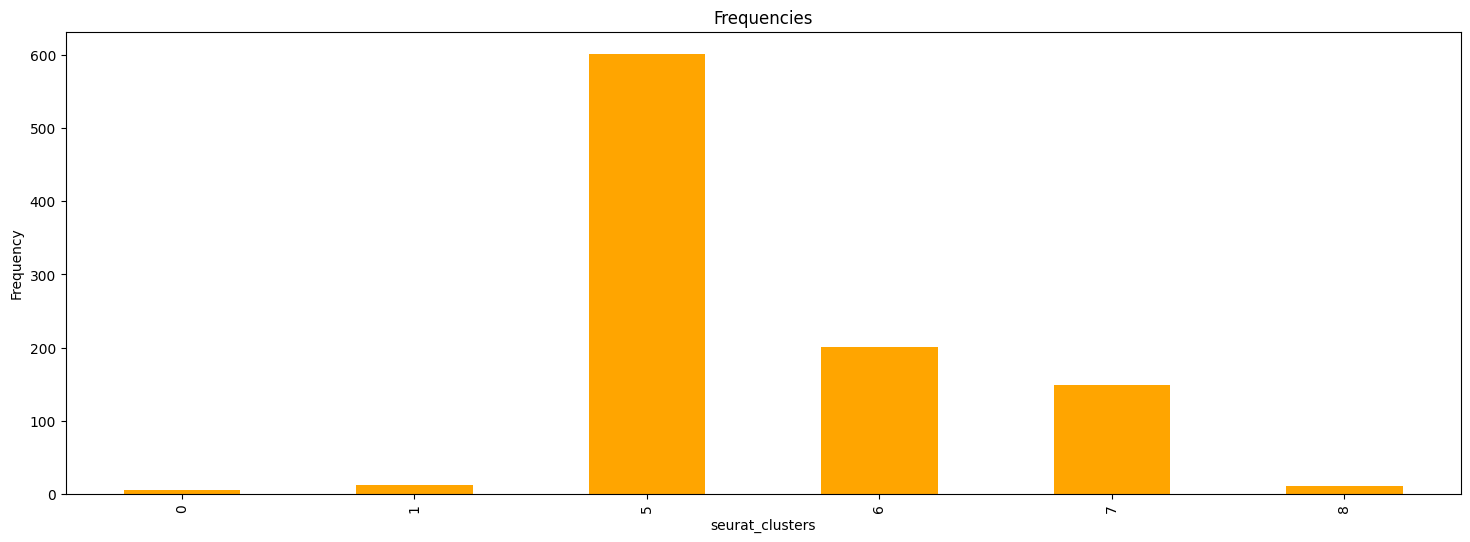

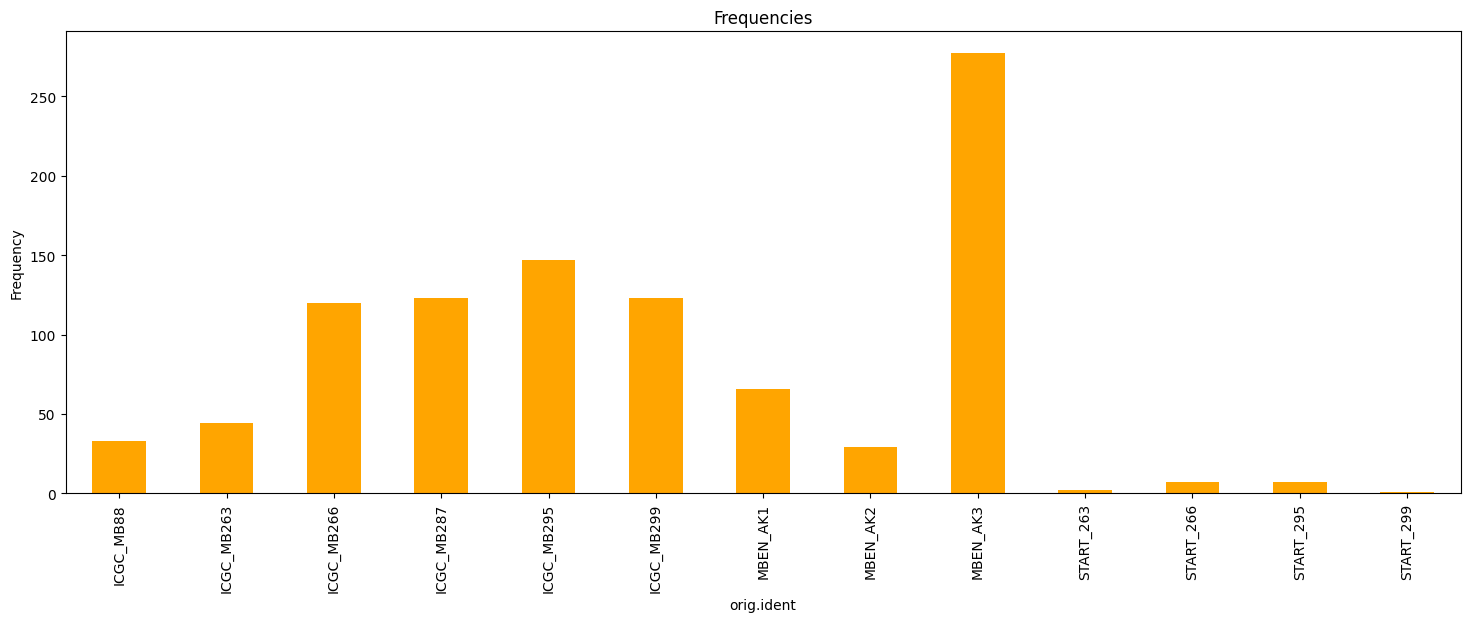

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

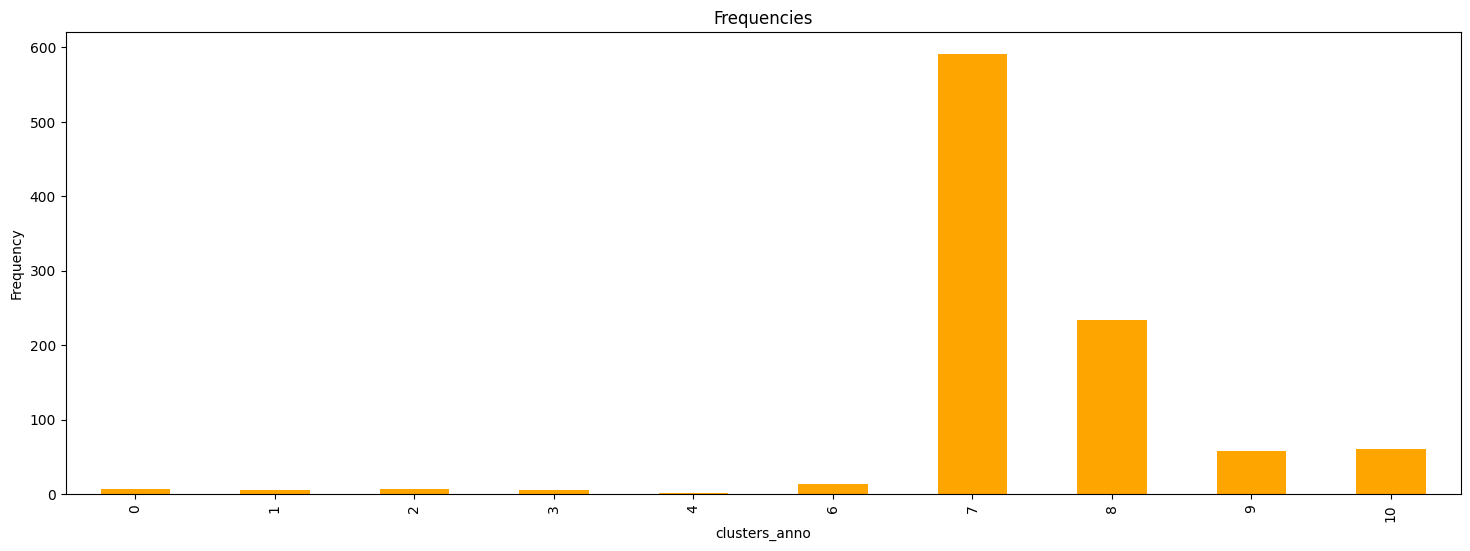

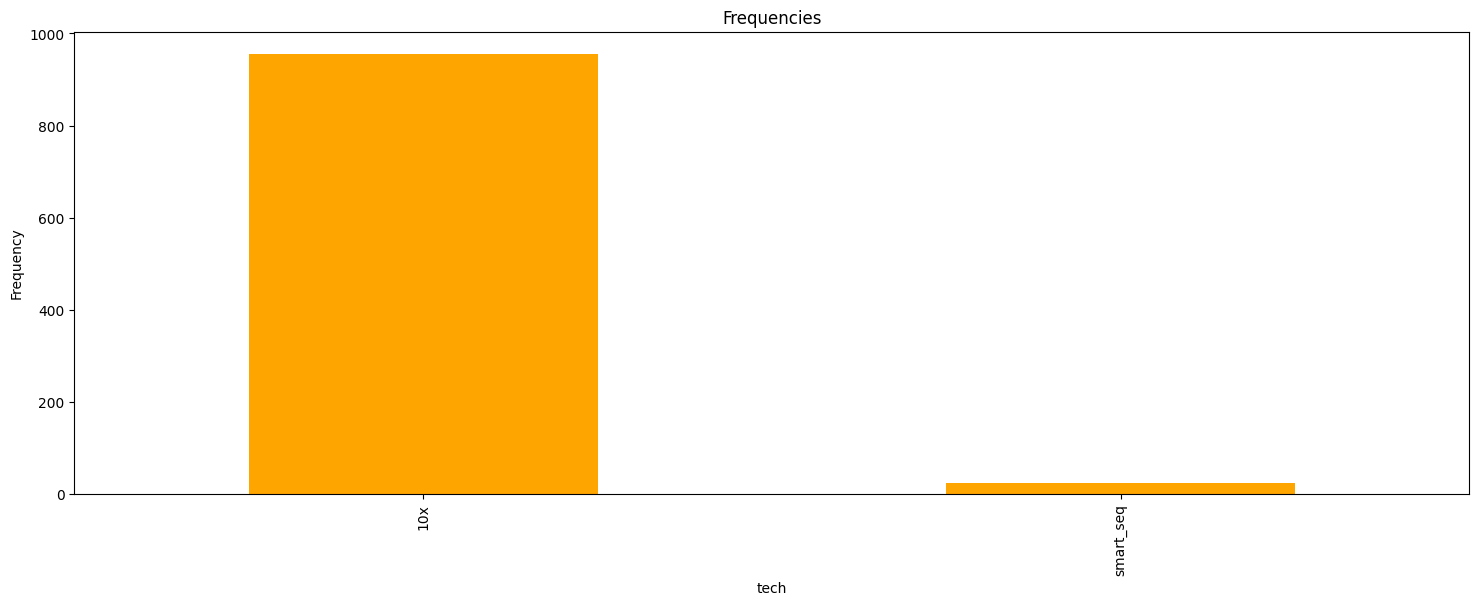

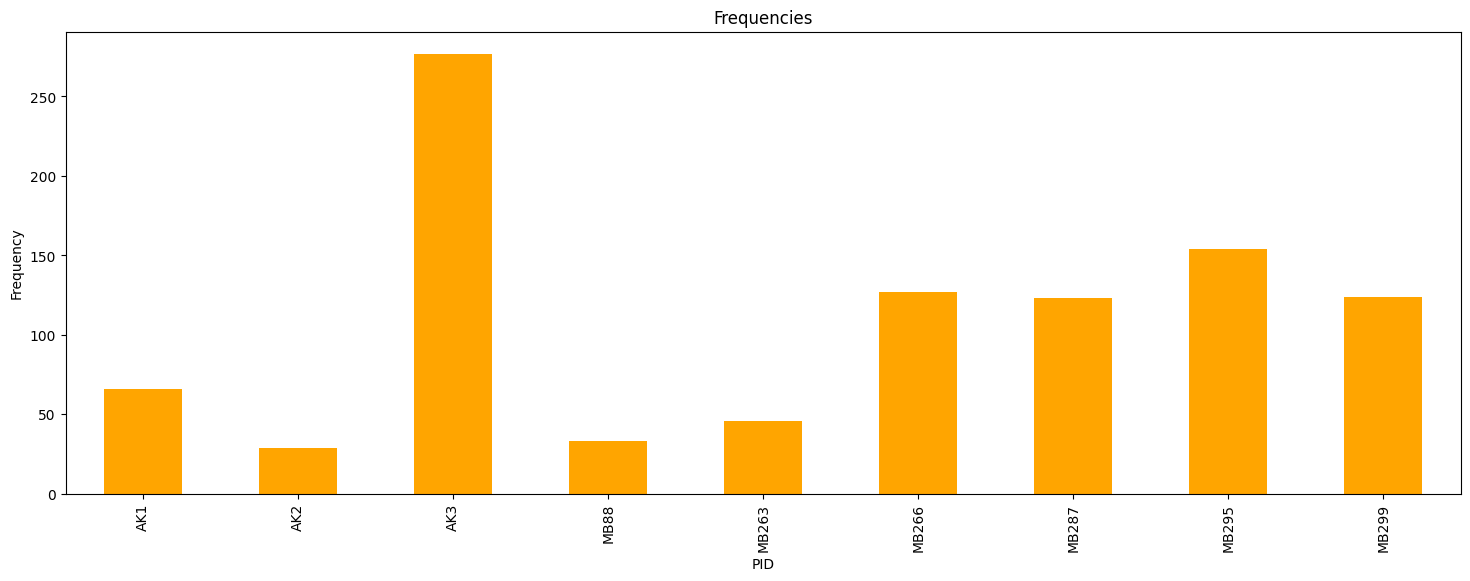

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

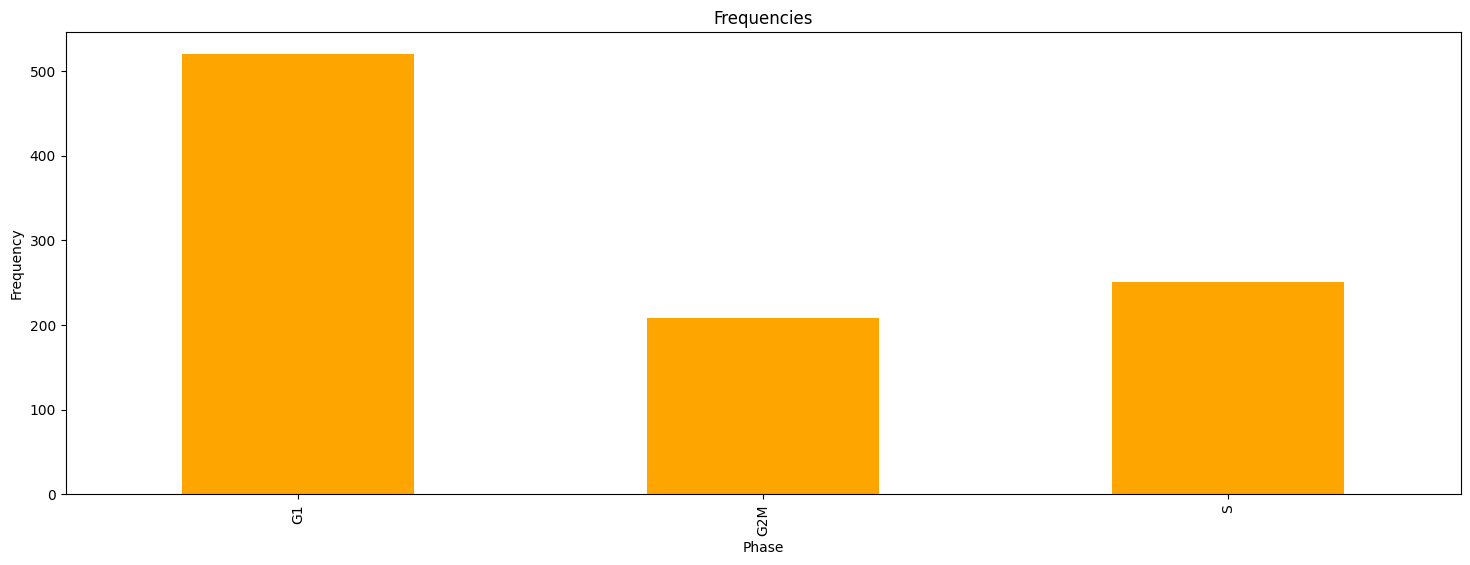

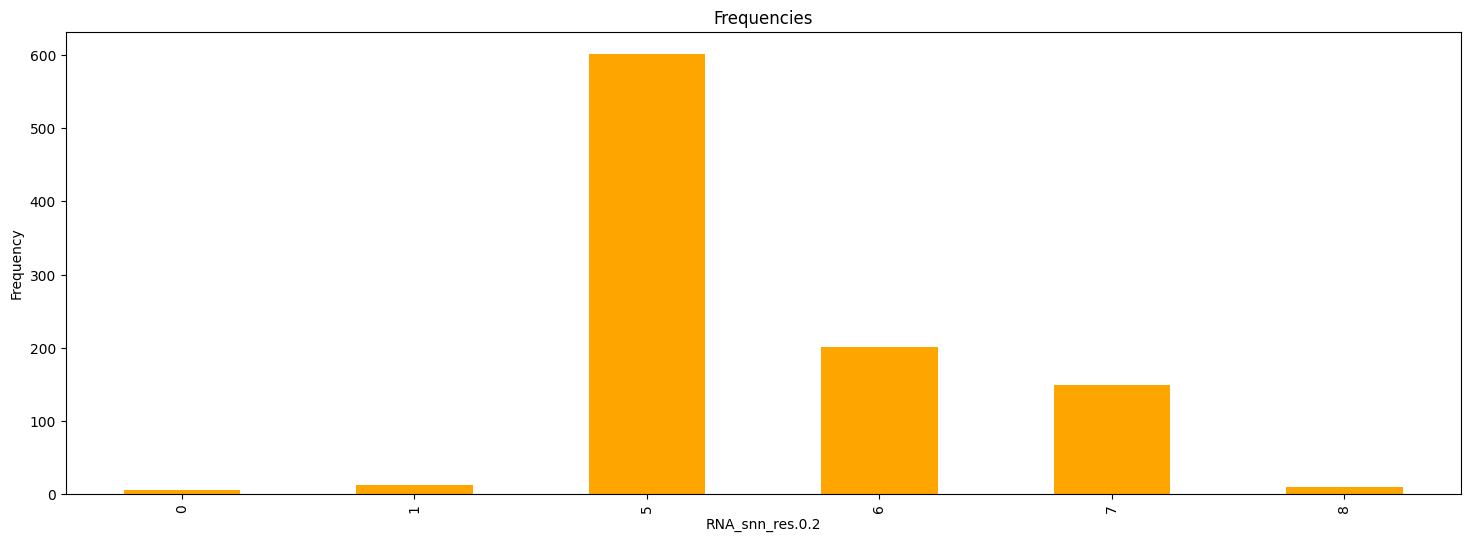

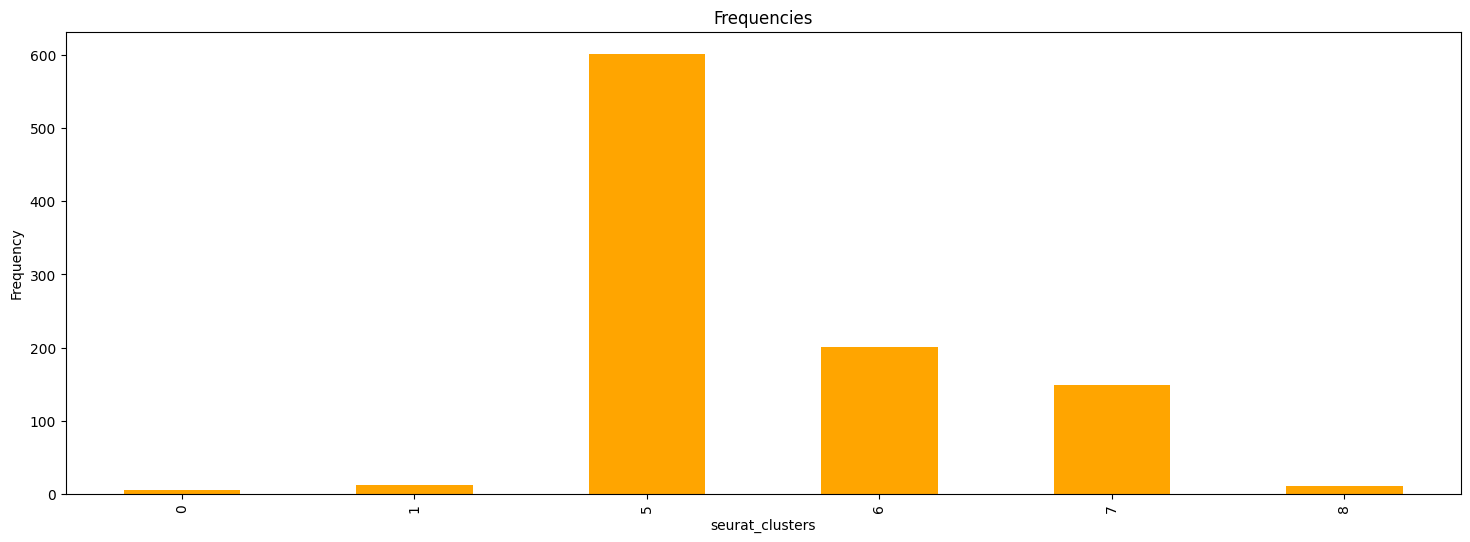

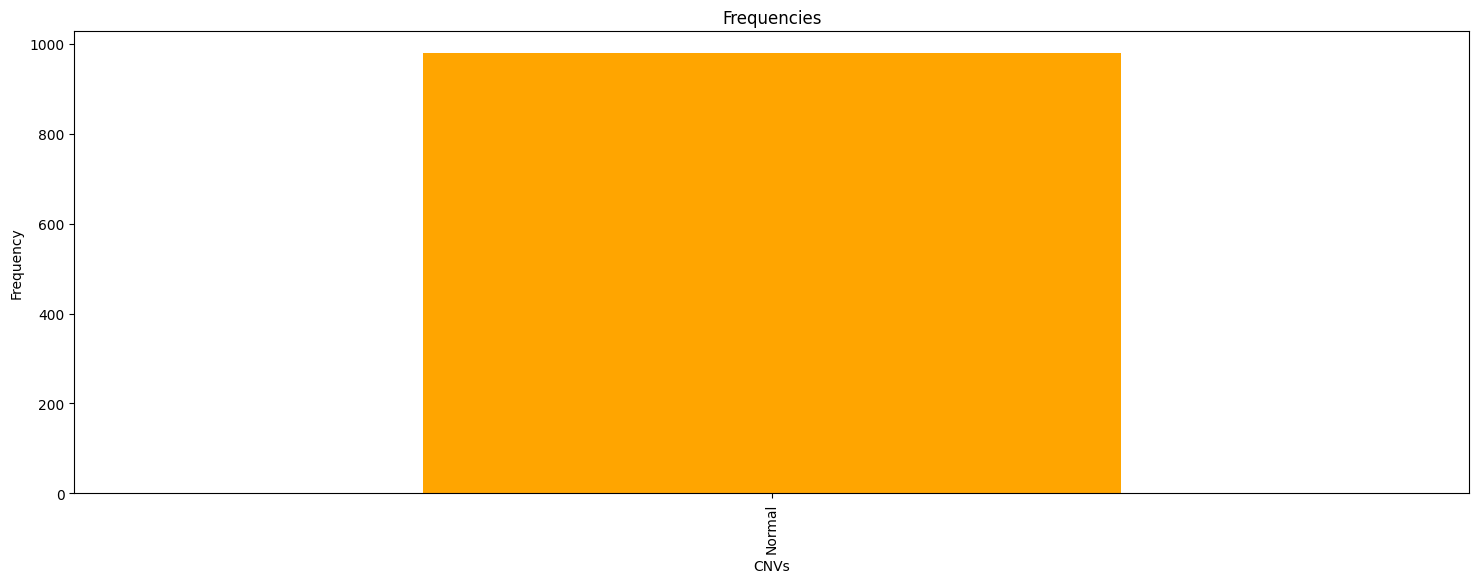

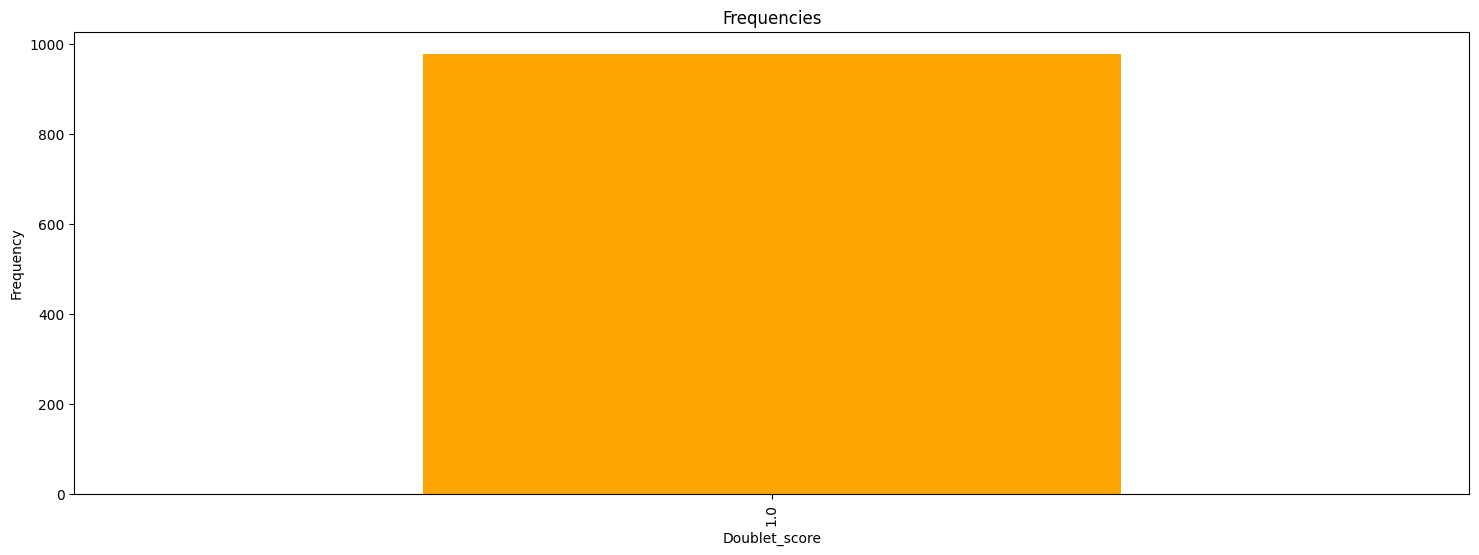

In [7]:
# Missing Features: relAb/norm & loop over all obs of interest
scl.plot_meta_barplots('seurat_clusters', None)
import matplotlib.pyplot as plt 
vals = scl.analysis.datasets[0].data.obs
#print(vals)
@scl.loop(vals, True)
def barplots(val):
    plt.figure(val)
    scl.plot_meta_barplots(val, None)
barplots()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'plt'

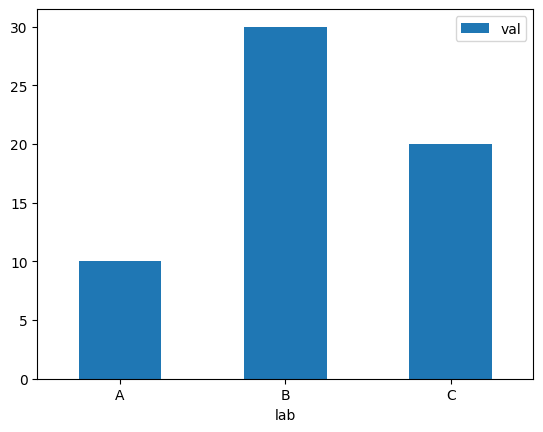

In [34]:
import matplotlib.pyplot as plt  
import pandas
df = pandas.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
def hm (dff):
    ax = df.plot.bar(x='lab', y='val', rot=0)
    plt.figure(1)
    ax.plt.bar()
    plt.figure(2)
    ax.plt.bar()
    plt.show()
hm(df)

In [7]:
a = analysis.datasets[1]
a._paths
a.analysis_params


{'proj_id': 'MBEN_T',
 'version': 'v00',
 'paths': {'analysis_path': '/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects',
  'data_root_path': '/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data/<default>',
  'data_root_filename': 'all_cnvsNormal_atac.h5ad'},
 'use_pickle_data': 'true',
 'organism': 'human',
 'seq_type': 'atac',
 'name': 'all_cnvsNormal'}

In [ ]:
#import decoupler as d

#d.decouple(analysis.datasets[2].data, model, methods=['mlm'])

#d.decouple(analysis.datasets[0].data, model, methods=['mlm'], consensus = False, use_raw = True)
#analysis.datasets[0].data.obsm['mlm_pvals'].loc[:, ['GLI1']]

In [ ]:
#d.decouple(analysis.datasets[0].data, model, methods=['mlm'], consensus = False, use_raw = False)
#analysis.datasets[0].data.obsm['mlm_pvals'].loc[:, ['GLI1']]

In [ ]:
#d.decouple(analysis.datasets[0].data, model, methods=['mlm'], consensus = False, use_raw = False, min_n=2)
#analysis.datasets[0].data.obsm['mlm_pvals'].loc[:, ['GLI1']]

In [ ]:
#ds = analysis.datasets[0]
#act = ds.acts[1]
#act = act.data.obsm['dorotheaabc_mlm_pvals']
#act
#act.loc[:, ['GLI3']]

In [ ]:
#'GLI1' in list(model.source)
#model.loc[model['source'] == 'GLI1']

In [ ]:
def getpath(nested_dict, value, prepath=(), search_value = True) -> tuple:
    """ Get a tuple of keys that lead to a given value in a given nested dictionary.

    Args:
        nested_dict (dict): A nested dictionary that shall be searched through.
        value (char): Either a key (search_value = False) or a value in the dict. 
        prepath (tuple, optional): Internal parameter used for recursion. Defaults to ().
        search_value (bool, optional): If the given 'value' to search for is a key or a value. Defaults to True.

    Returns:
        path (tuple): The order of keys that leads to the value in the dict.
    
    Use Case:
        workflows.scfunctions.getpath({1: {'name': 'John', 'age': '27', 'sex': 'Male'}, 2: {'name': 'Marie', 'age': '22', 'sex': 'Female'}}, 'Female')

    Caution: 
        When the value is a key, another key is the same if it is exactly the some or if its prefix (before underscore) is the same. 
    
    Code mostly taken from:
        [Stackoverflow - answer from jsf](https://stackoverflow.com/questions/22162321/search-for-a-value-in-a-nested-dictionary-python)
    """
    
    for k, v in nested_dict.items():
        path = prepath + (k,)
        if(search_value == False): 
            # search for key instead of value
            if (k == value) | (k.split('_')[0] == value): # to allow for using multiple similar keys in a dict like 'replacement_1', ...
                return path
            elif hasattr(v, 'items'):
                p = getpath(v, value, path, search_value) # recursive call
                if p is not None:
                    return p
        elif value in v: # found value
            return path
        elif hasattr(v, 'items'): # v is a dict
            p = getpath(v, value, path, search_value) # recursive call
            if p is not None:
                return p

In [ ]:
from functools import reduce
def dict_delete_key(dict, path):
    pathlen = len(path)
    r = range(0,pathlen-1)
    del (reduce(lambda d,i: d[path[i]], r, dict))[path[pathlen-1]]

In [ ]:

def replace_dictvalues(target, placeholder = 'replacements') -> dict:
    """ Executes replacements indicated by the placeholder key (or a key matching'placeholder_.*') in a dictionary. 

    Args:
        target (dict): A dictionary. 
        placeholder (str): If the placeholder key is not inside the dictionary, nothing happens.  
        Otherwise the key value pairs in the placeholder dictionary replace all values of the keys that follow.
        Replacements are done in dictionaries on the same level as the placeholder that follow in the ordered dict after the placeholder
        The dictionaries are only checked for having the key in the top level. 
    Returns:
        dict: A copy of the input dictionary with executed replacements
    Usage: 
        Can be used together with (before or after) merge_dicts()
    Example: 
    dict_2 = {'pets': {'snail': {'name': 'Schnucki',  'food': ['Löwenzahn', 'water'], 'sound': ['knusper',]},
                       'replacements_1': {'name': 'LittleWauWau','sound': ['kikerikii']},    
                        'dog': {'sound': ['wau', 'add', 'grrr']}, 
                        'replacements_2': {'color': 'orange'},
                        'cat': {'name': 'Miezy', 'food': ['add', 'mice'], 'color': 'pink & yellow stripes', 'child': {
                            'babyCat': {'name': 'MiniMiez', 'food': ['milk'], 'color': 'yellow with pink dots'}}}}}
    > {'pets': {'snail': {'name': 'Schnucki', 'food': ['Löwenzahn', 'water'], 'sound': ['knusper']},
                'dog': {'sound': ['kikerikii'], 'name': 'LittleWauWau'},
                'cat': {'name': 'LittleWauWau', 'food': ['add', 'mice'], 'color': 'orange', , 'sound': ['kikerikii'], 'child': {
                    'babyCat': {'name': 'MiniMiez', 'food': ['milk'], 'color': 'yellow with pink dots'}}}}}
    """
    replacements_path = getpath(target, placeholder, search_value = False)          # ['pets', 'replacements']
    replacements_path_fordeletion = replacements_path
    if replacements_path != None: 
        placeholder = replacements_path_fordeletion[-1]
        replacements_path = list(replacements_path)
        replacement_values = sc_funcs.deep_get(target, replacements_path)            # {'name': 'LittleWauWau', 'sound': 'kikerikii'}
        del replacements_path[-1]                                                    # ['pets']  
        replacements_dict = sc_funcs.deep_get(target, replacements_path)             # {'replacements':{}, 'dog':{}, 'cat':{}}
        keys = list(replacements_dict.keys())
        ind = keys.index(placeholder)                                                # 0
        for k in keys[ind+1:]:
            if k != placeholder:
                sub_dict_path = getpath(target, k, search_value = False)    # ('pets', 'dog')
                sub_dict = sc_funcs.deep_get(target, sub_dict_path)
                merged = sc_funcs.merge_dicts(sub_dict, replacement_values)
                target = sc_funcs.dict_replace(deepcopy(target), merged, replacements_path+[k]) # cp
        dict_delete_key(target, replacements_path_fordeletion)
        return replace_dictvalues(target)
    else: 
        return target




# Get_subsets

In [16]:
#scl.get_subsets(dc_dataset)


{'analysis_path': '/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/projects',
 'data_root_path': '/Users/hanna/Documents/projects/Workflows/standard-workflows/standard_workflows/example_data/<default>'}

# Save Paths

In [25]:
def save_paths(self):
    """ Saves analysis params together with paths to yaml file. """
    self.analysis_params['proj_params']['paths'] = self.get_paths()
    with open(os.path.join(self.get_paths()['analysis_path'],'analysis_params_paths.yaml'), 'w+') as file:
        yaml.dump(self.analysis_params, file)
    for data in self.datasets:
        data.analysis_params['paths'] = data._paths
        #print(data._paths)
        with open(os.path.join(data._paths['analysis_path'], data._paths['datasetpath'],'analysis_params.yaml'), 'w+') as file:
            yaml.dump(data.analysis_params, file)



In [26]:
save_paths(analysis)

In [ ]:
#import decoupler as d
#model = d.get_dorothea(levels = ['A', 'B', 'C'])
m = model.loc[model['source'] == 'GLI2']
print(m)

data = analysis.datasets[0].data

print(data.var_names)

print("BCL2" in data.var_names)
print("CCND1" in data.var_names)
print("COL5A2" in data.var_names)
print("EFEMP1" in data.var_names)
print("FAS" in data.var_names)
print("FGF13" in data.var_names)
print("FOXA2" in data.var_names)
print("FOXE1" in data.var_names)
print("IFNGR1" in data.var_names)
print("LUM" in data.var_names)



In [ ]:
print(data.raw.var_names)

print("BCL2" in data.raw.var_names)
print("CCND1" in data.raw.var_names)
print("COL5A2" in data.raw.var_names)
print("EFEMP1" in data.raw.var_names)
print("FAS" in data.raw.var_names)
print("FGF13" in data.raw.var_names)
print("FOXA2" in data.raw.var_names)
print("FOXE1" in data.raw.var_names)
print("IFNGR1" in data.raw.var_names)
print("LUM" in data.raw.var_names)

## Decoupler  
### Activity estimates  
For each dataset the activities are estimated according to the given prior knowledge and decoupler parameters. 

In [27]:
#%%asmarkdown
scl.get_acts()



#import decoupler as d
#d.run_consensus(analysis.datasets[1].data)
#data = analysis.datasets[0]
#a = data.acts[2]
#c = d.decouple(analysis.datasets[0].data, d.get_dorothea())

** all_cnvsNormal **  


AttributeError: 'Dataset' object has no attribute 'get_all_acts'

In [ ]:
scl.plot_umap()

### Mean Activities
For each calculated activity the mean activity values are calculated. 

In [ ]:
#%%asmarkdown
scl.get_mean_acts()

In [ ]:
#%%asmarkdown
scl.plot_mean_acts()


In [ ]:
import os
import shutil

dir_name = "/Users/hanna/Documents/projects/MBEN/v01/sent/v01_sent220901/"

def delete_files(dir_name):
    all_subdir_names = ''
    if os.path.isdir(dir_name):
        all_subdir_names = os.listdir(dir_name)
        print(all_subdir_names)
        if len(all_subdir_names) >= 1:
            for elem in all_subdir_names:
                match = re.match("^.*(h5ad|DS_Store|pickle|priorKnowledge|data|analysis_params.yaml)", elem)
                if match != None:
                    if os.path.isdir(os.path.join(dir_name, elem)) : 
                        shutil.rmtree(os.path.join(dir_name, elem))  
                        print('this gets deleted: ', elem)
                    else: 
                        os.remove(os.path.join(dir_name, elem))
                         
                        print('this gets deleted: ', elem)
                else :
                    print('new iteration with: ', os.path.join(dir_name, elem))
                    print(delete_files(os.path.join(dir_name, elem)))

delete_files(dir_name)

In [ ]:
dir_name = "/Users/hanna/Documents/projects/MBEN/v01_copy/human/sn.h5ad/.DS_Store"
print(re.match("^.*[.h5ad|.DS_Store]", dir_name)[0])